In [1]:
import pandas as pd
import numpy as np

Mw=float(input('Enter Mw: '))
R_epi=float(input('Enter R epi: '))
Vs30= float(input('Enter Vs30: '))
fd=float(input('Enter Event depth: '))
Fm=int(input('Enter Fault mechanism: '))

inp=[Mw,np.log10(R_epi),R_epi,np.log10(Vs30),fd,Fm]
print(inp)

Enter Mw:  6
Enter R epi:  150
Enter Vs30:  360
Enter Event depth:  30
Enter Fault mechanism:  1


[6.0, 2.1760912590556813, 150.0, 2.5563025007672873, 30.0, 1]


In [2]:
inp

[6.0, 2.1760912590556813, 150.0, 2.5563025007672873, 30.0, 1]

In [3]:
time=[0,0.01,0.025,0.04,0.05,0.07,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.6,0.7,0.75,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10]


In [4]:

def predict(generator, sample, latent_dim,total_data):

    z_input = np.random.randn(total_data,latent_dim)
    generated_output = generator.predict([z_input, sample])
    return generated_output
    

In [5]:
from numpy.random import randn
import matplotlib.pyplot as plt
import pickle
from joblib import load
from keras.models import load_model

scaler = load('scaler_input_6.joblib')
generator=load_model('generator_9099.h5')
latent_dim=3
input=inp.copy()
for i in range(37):
        input.append(0)

input_df= pd.DataFrame(np.array(input).reshape(1,-1))
lst1=['IP1_Event_Magnitude', 'log(IP2_R_epi)', 'IP2_R_epi','log(IP3_Vs30)','IP4_Event_Depth','IP5_Fault']
lst2=[f'p{i+1}' for i in range(37)]
lst=lst1+lst2
input_df.columns=lst
# print(input_df)

scaled_df=pd.DataFrame(scaler.transform(input_df))
lst1=['IP1_Event_Magnitude', 'log(IP2_R_epi)', 'IP2_R_epi','log(IP3_Vs30)','IP4_Event_Depth','IP5_Fault']
lst2=[f'p{i+1}' for i in range(37)]
lst=lst1+lst2
scaled_df.columns=lst
# print(scaled_df)

sample_2 = scaled_df[['IP1_Event_Magnitude', 'log(IP2_R_epi)', 'IP2_R_epi','log(IP3_Vs30)', 'IP4_Event_Depth','IP5_Fault']].values
med=[]
for i in range(100):
    out=predict(generator, sample_2, latent_dim,len(sample_2))
    # our=scaler.inverse_transform(out)
    med.append(out)



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

In [6]:
result=np.array(med)
results=np.squeeze(result)
import numpy as np
# Compute the median along the first axis (axis=0)
median_array = np.median(results, axis=0)


In [7]:

final_results= np.vstack([results, median_array])


In [8]:
RS= scaler.inverse_transform(final_results)

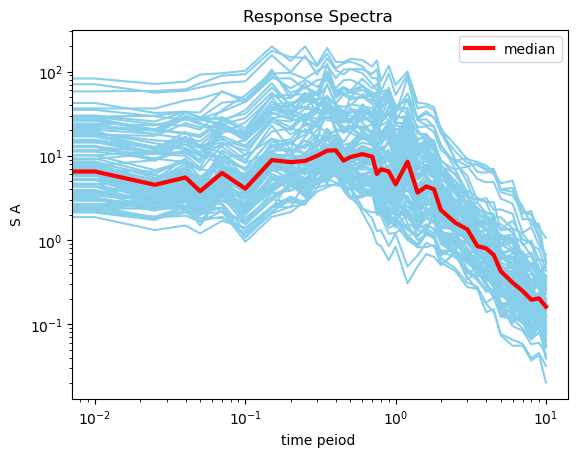

In [10]:

import matplotlib.pyplot as plt


for i in range(100): 
    plt.plot(time,np.exp(RS[i][6:]), color ='skyblue')
    plt.xlabel('time peiod ')
    plt.ylabel('S A')
    plt.title('Response Spectra ')
   

plt.plot(time,np.exp(RS[100][6:]), label='median',linewidth = 3,color ='red')
plt.xscale('log')
plt.yscale('log')
plt.legend()